# Regression with Feature Extraction

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [145]:
df = pd.read_csv("LaptopData.csv")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [146]:
df = df.fillna(method = 'ffill')

C:\Users\71524\AppData\Local\Temp\ipykernel_11696\439241999.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'ffill')


In [147]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<Axes: >

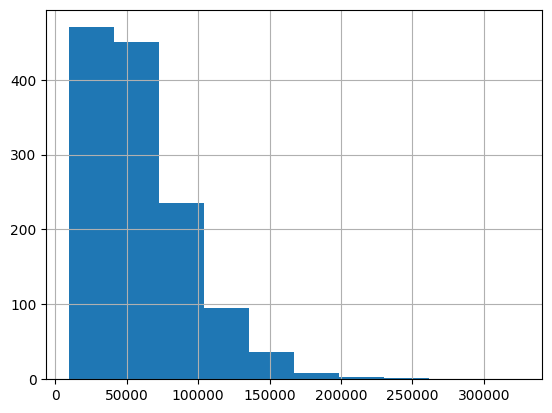

In [148]:
df.Price.hist()

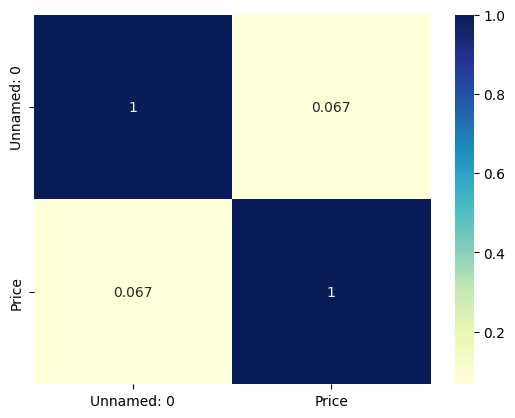

In [149]:
corr = df.select_dtypes(include=np.number).corr()
dataplot = sb.heatmap(corr,  annot=True, cmap="YlGnBu") # cmap="YlGnBu",
plt.show()

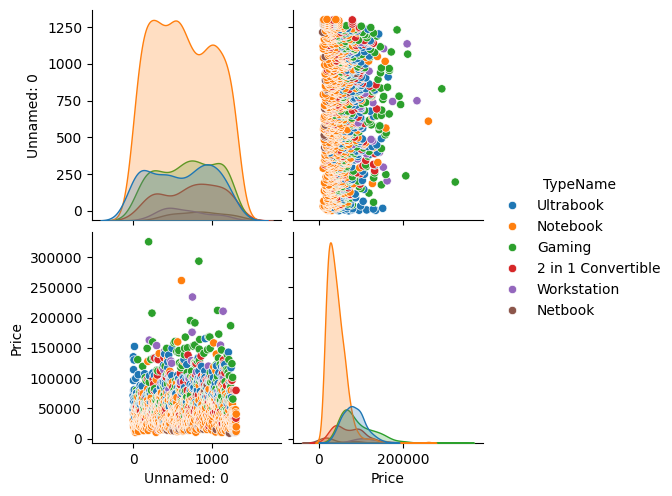

In [150]:
sb.pairplot(df, hue="TypeName")
plt.show()

# Feature Extraction

In [151]:
# Memory Column
df['MemoryType'] = df['Memory'].apply(lambda x: 'SSD' if 'SSD' in x else 'HDD')

def extract_capacity(memory):
    parts = memory.split()
    size_part = parts[0]
    
    size = ''.join(filter(str.isdigit, size_part))
    unit = ''.join(filter(str.isalpha, size_part))
    
    if size:
        size = float(size)
        if unit.upper() == 'TB':
            size *= 1024
        return size
    else:
        return None

df['MemoryCapacity'] = df['Memory'].apply(extract_capacity)

print(df[['MemoryType', 'MemoryCapacity']])

     MemoryType  MemoryCapacity
0           SSD           128.0
1           HDD           128.0
2           SSD           256.0
3           SSD           512.0
4           SSD           256.0
...         ...             ...
1298        SSD           128.0
1299        SSD           512.0
1300        HDD            64.0
1301        HDD          1024.0
1302        HDD           500.0

[1303 rows x 2 columns]


In [152]:
# Cpu Column
def extract_cpu_model(cpu):
    parts = cpu.split(' ')
    if parts[-1][-3:] == 'GHz':
        return ' '.join(parts[:-1])
    else:
        return ' '.join(parts[:-2]) 

def extract_clock_speed(cpu):
    clock_speed = cpu.split(' ')[-1]
    return clock_speed.replace('GHz', '')

# Apply the functions
df['CPUModel'] = df['Cpu'].apply(extract_cpu_model)
df['CPUClockSpeed'] = df['Cpu'].apply(extract_clock_speed)
print(df[['CPUModel', 'CPUClockSpeed']])

                           CPUModel CPUClockSpeed
0                     Intel Core i5           2.3
1                     Intel Core i5           1.8
2               Intel Core i5 7200U           2.5
3                     Intel Core i7           2.7
4                     Intel Core i5           3.1
...                             ...           ...
1298            Intel Core i7 6500U           2.5
1299            Intel Core i7 6500U           2.5
1300  Intel Celeron Dual Core N3050           1.6
1301            Intel Core i7 6500U           2.5
1302  Intel Celeron Dual Core N3050           1.6

[1303 rows x 2 columns]


In [153]:
# Gpu Column
def extract_gpu_company(gpu):
    return gpu.split(' ')[0]

df['GPUCompany'] = df['Gpu'].apply(extract_gpu_company)

print(df[['Gpu', 'GPUCompany']])

                               Gpu GPUCompany
0     Intel Iris Plus Graphics 640      Intel
1           Intel HD Graphics 6000      Intel
2            Intel HD Graphics 620      Intel
3               AMD Radeon Pro 455        AMD
4     Intel Iris Plus Graphics 650      Intel
...                            ...        ...
1298         Intel HD Graphics 520      Intel
1299         Intel HD Graphics 520      Intel
1300             Intel HD Graphics      Intel
1301            AMD Radeon R5 M330        AMD
1302             Intel HD Graphics      Intel

[1303 rows x 2 columns]


In [154]:
# Ram Column
df['Ram'] = df['Ram'].str.replace('GB', '')
print(df['Ram'])

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: object


In [155]:
# Weight Column
df['Weight'] = df['Weight'].str.replace('kg', '')
print(df['Weight'])

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298     1.8
1299     1.3
1300     1.5
1301    2.19
1302     2.2
Name: Weight, Length: 1303, dtype: object


In [156]:
# ScreenResolution Column
def extract_screen_details(resolution):
    if pd.isna(resolution):
        return None, 0, np.nan, np.nan
    
    parts = resolution.split(' ')
    screen_name = ' '.join(parts[:-1])
    resolution_part = parts[-1]
    
    if 'x' in resolution_part:
        resolution_parts = resolution_part.split('x')
        width = int(resolution_parts[0])
        height = int(resolution_parts[1])
    else:
        width = np.nan
        height = np.nan
    
    screen_type = None
    touchscreen = 0
    
    for part in parts:
        if 'Panel' in part:
            screen_type = part
        elif 'Touchscreen' in part:
            touchscreen = 1
    
    return screen_name, touchscreen, width, height

df['ScreenName'], df['Touchscreen'], df['ResolutionWidth'], df['ResolutionHeight'] = zip(*df['ScreenResolution'].apply(extract_screen_details))
print(df[['ScreenName', 'Touchscreen', 'ResolutionWidth', 'ResolutionHeight']])

                            ScreenName  Touchscreen  ResolutionWidth  \
0             IPS Panel Retina Display            0             2560   
1                                                 0             1440   
2                              Full HD            0             1920   
3             IPS Panel Retina Display            0             2880   
4             IPS Panel Retina Display            0             2560   
...                                ...          ...              ...   
1298   IPS Panel Full HD / Touchscreen            1             1920   
1299  IPS Panel Quad HD+ / Touchscreen            1             3200   
1300                                              0             1366   
1301                                              0             1366   
1302                                              0             1366   

      ResolutionHeight  
0                 1600  
1                  900  
2                 1080  
3                 1800  
4         

In [157]:
df.drop(columns=['Memory'], inplace=True)
df.drop(columns=['Cpu'], inplace=True)
df.drop(columns=['ScreenResolution'], inplace=True)
print(df.head())

   Unnamed: 0 Company   TypeName Inches Ram                           Gpu  \
0         0.0   Apple  Ultrabook   13.3   8  Intel Iris Plus Graphics 640   
1         1.0   Apple  Ultrabook   13.3   8        Intel HD Graphics 6000   
2         2.0      HP   Notebook   15.6   8         Intel HD Graphics 620   
3         3.0   Apple  Ultrabook   15.4  16            AMD Radeon Pro 455   
4         4.0   Apple  Ultrabook   13.3   8  Intel Iris Plus Graphics 650   

   OpSys Weight        Price MemoryType  MemoryCapacity             CPUModel  \
0  macOS   1.37   71378.6832        SSD           128.0        Intel Core i5   
1  macOS   1.34   47895.5232        HDD           128.0        Intel Core i5   
2  No OS   1.86   30636.0000        SSD           256.0  Intel Core i5 7200U   
3  macOS   1.83  135195.3360        SSD           512.0        Intel Core i7   
4  macOS   1.37   96095.8080        SSD           256.0        Intel Core i5   

  CPUClockSpeed GPUCompany                ScreenName  To

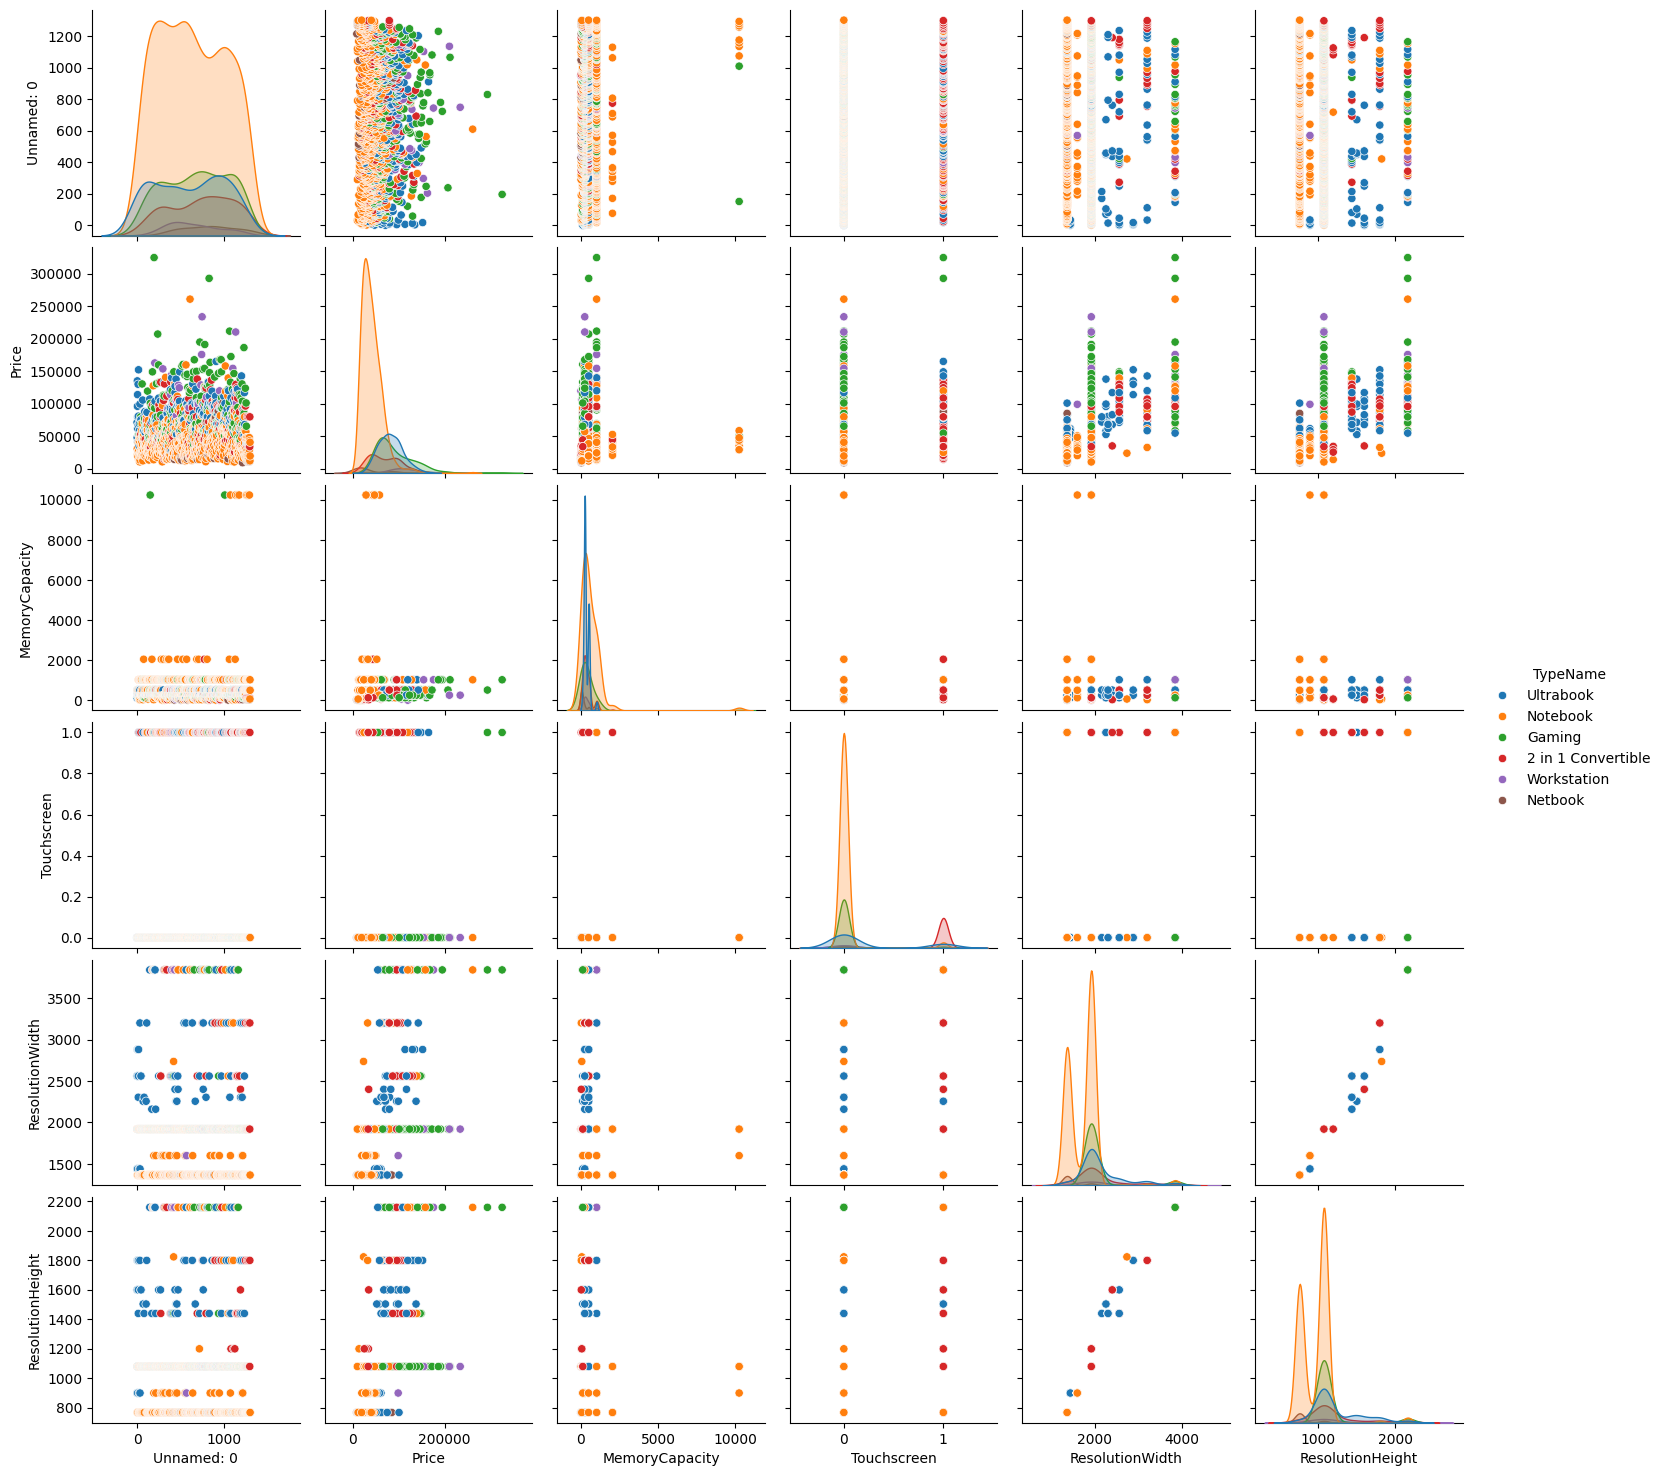

In [158]:
sb.pairplot(df, hue="TypeName")
plt.show()

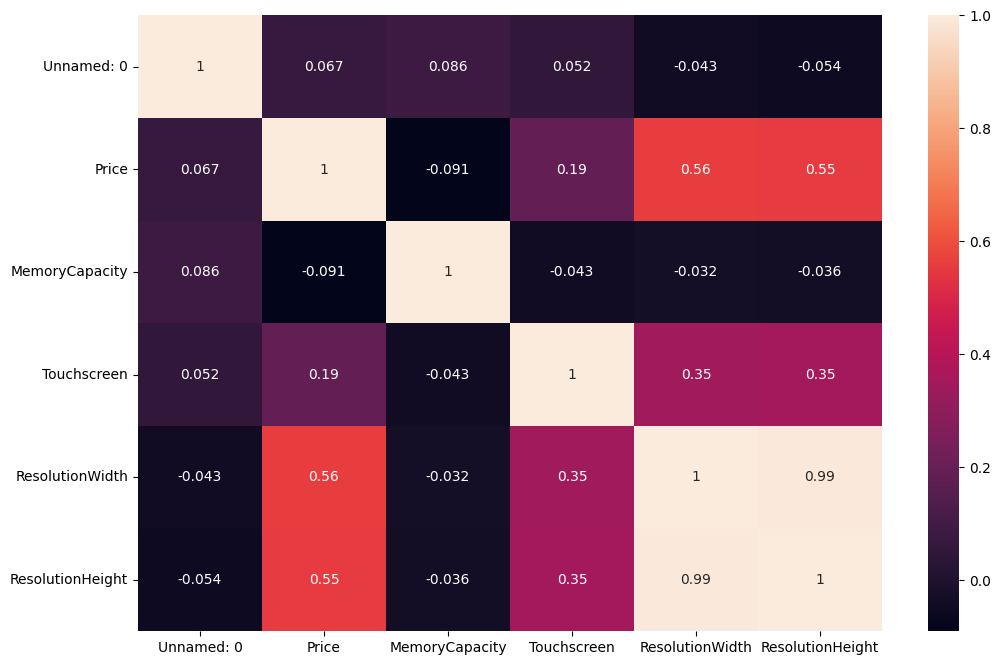

In [159]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
dataplot = sb.heatmap(corr, annot=True)
plt.show()

In [160]:
from sklearn.preprocessing import MinMaxScaler
# Scaling for columns except the target (Price) column
numeric_columns = ['Inches', 'Ram', 'Weight', 'MemoryCapacity' , 'CPUClockSpeed' , 'Touchscreen', 'ResolutionWidth', 'ResolutionHeight']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [161]:
df_copy = df
df_copy

,Unnamed: 0,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,MemoryType,MemoryCapacity,CPUModel,CPUClockSpeed,GPUCompany,ScreenName,Touchscreen,ResolutionWidth,ResolutionHeight
0,0.0,Apple,Ultrabook,0.125490,0.111111,Intel Iris Plus Graphics 640,macOS,0.123408,71378.6832,SSD,0.011728,Intel Core i5,0.518519,Intel,IPS Panel Retina Display,0.0,0.482619,0.597701
1,1.0,Apple,Ultrabook,0.125490,0.111111,Intel HD Graphics 6000,macOS,0.120705,47895.5232,HDD,0.011728,Intel Core i5,0.333333,Intel,,0.0,0.029911,0.094828
2,2.0,HP,Notebook,0.215686,0.111111,Intel HD Graphics 620,No OS,0.167553,30636.0000,SSD,0.024238,Intel Core i5 7200U,0.592593,Intel,Full HD,0.0,0.223929,0.224138
3,3.0,Apple,Ultrabook,0.207843,0.238095,AMD Radeon Pro 455,macOS,0.164850,135195.3360,SSD,0.049257,Intel Core i7,0.666667,AMD,IPS Panel Retina Display,0.0,0.611964,0.741379
4,4.0,Apple,Ultrabook,0.125490,0.111111,Intel Iris Plus Graphics 650,macOS,0.123408,96095.8080,SSD,0.024238,Intel Core i5,0.814815,Intel,IPS Panel Retina Display,0.0,0.482619,0.597701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,0.152941,0.047619,Intel HD Graphics 520,Windows 10,0.162147,33992.6400,SSD,0.011728,Intel Core i7 6500U,0.592593,Intel,IPS Panel Full HD / Touchscreen,1.0,0.223929,0.224138
1299,1299.0,Lenovo,2 in 1 Convertible,0.125490,0.238095,Intel HD Graphics 520,Windows 10,0.117101,79866.7200,SSD,0.049257,Intel Core i7 6500U,0.592593,Intel,IPS Panel Quad HD+ / Touchscreen,1.0,0.741310,0.741379
1300,1300.0,Lenovo,Notebook,0.152941,0.015873,Intel HD Graphics,Windows 10,0.135120,12201.1200,HDD,0.005473,Intel Celeron Dual Core N3050,0.259259,Intel,,0.0,0.000000,0.000000
1301,1301.0,HP,Notebook,0.215686,0.079365,AMD Radeon R5 M330,Windows 10,0.197283,40705.9200,HDD,0.099296,Intel Core i7 6500U,0.592593,AMD,,0.0,0.000000,0.000000


In [162]:
df_copy = df_copy.drop('Unnamed: 0', axis=1)

In [163]:
categorical = df_copy.select_dtypes(exclude = np.number).columns
categorical

Index(['Company', 'TypeName', 'Gpu', 'OpSys', 'MemoryType', 'CPUModel',
       'GPUCompany', 'ScreenName'],
      dtype='object')

In [164]:
classes = dict()
le = LabelEncoder()
for col in categorical:
    df_copy[col]= le.fit_transform(df_copy[col])
    classes[col] = le.classes_

In [165]:
df_copy

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,MemoryType,MemoryCapacity,CPUModel,CPUClockSpeed,GPUCompany,ScreenName,Touchscreen,ResolutionWidth,ResolutionHeight
0,1,4,0.125490,0.111111,58,8,0.123408,71378.6832,1,0.011728,51,0.518519,2,12,0.0,0.482619,0.597701
1,1,4,0.125490,0.111111,51,8,0.120705,47895.5232,0,0.011728,51,0.333333,2,0,0.0,0.029911,0.094828
2,7,3,0.215686,0.111111,53,4,0.167553,30636.0000,1,0.024238,57,0.592593,2,3,0.0,0.223929,0.224138
3,1,4,0.207843,0.238095,9,8,0.164850,135195.3360,1,0.049257,65,0.666667,0,12,0.0,0.611964,0.741379
4,1,4,0.125490,0.111111,59,8,0.123408,96095.8080,1,0.024238,51,0.814815,2,12,0.0,0.482619,0.597701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,0.152941,0.047619,47,5,0.162147,33992.6400,1,0.011728,66,0.592593,2,9,1.0,0.223929,0.224138
1299,10,0,0.125490,0.238095,47,5,0.117101,79866.7200,1,0.049257,66,0.592593,2,11,1.0,0.741310,0.741379
1300,10,3,0.152941,0.015873,40,5,0.135120,12201.1200,0,0.005473,31,0.259259,2,0,0.0,0.000000,0.000000
1301,7,3,0.215686,0.079365,21,5,0.197283,40705.9200,0,0.099296,66,0.592593,0,0,0.0,0.000000,0.000000


In [166]:
df_copy.isna().sum()
df_copy = df_copy.fillna(method = 'ffill')
df_copy.isna().sum()

C:\Users\71524\AppData\Local\Temp\ipykernel_11696\1949432904.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy = df_copy.fillna(method = 'ffill')


Company             0
TypeName            0
Inches              0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price               0
MemoryType          0
MemoryCapacity      0
CPUModel            0
CPUClockSpeed       0
GPUCompany          0
ScreenName          0
Touchscreen         0
ResolutionWidth     0
ResolutionHeight    0
dtype: int64

In [167]:
X = df_copy.drop(columns = 'Price').values
X

array([[ 1.        ,  4.        ,  0.1254902 , ...,  0.        ,
         0.48261924,  0.59770115],
       [ 1.        ,  4.        ,  0.1254902 , ...,  0.        ,
         0.02991108,  0.09482759],
       [ 7.        ,  3.        ,  0.21568627, ...,  0.        ,
         0.22392886,  0.22413793],
       ...,
       [10.        ,  3.        ,  0.15294118, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        ,  3.        ,  0.21568627, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.        ,  3.        ,  0.21568627, ...,  0.        ,
         0.        ,  0.        ]])

In [168]:
y = df_copy['Price'].values
y

array([71378.6832, 47895.5232, 30636.    , ..., 12201.12  , 40705.92  ,
       19660.32  ])

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.shape

(391, 16)

In [170]:
reg = LinearRegression() # ols
reg.fit(X_train, y_train)

LinearRegression()

In [171]:
y_pred = reg.predict(X_test)

In [172]:
y_pred[:10]

array([67800.35945583, 63812.65577267, 30427.32002624, 69193.99270628,
       60926.15128532, 60573.09931315, 51371.05000937, 35698.41419945,
       70783.98338563, 16689.93389307])

In [173]:
y_test[:10]

array([89084.16, 61218.72, 26586.72, 47898.72, 58554.72, 86793.12,
       38308.32, 24455.52, 63456.48, 18594.72])

In [174]:
np.mean(np.abs(y_pred-y_test))

15717.818109668973

In [175]:
np.mean(np.square(y_test - y_pred))

502522612.78955406

In [176]:
y_mean = np.mean(y_test)
TSS = np.sum(np.square(y_test - y_mean))
RSS = np.sum(np.square(y_test - y_pred))
1- RSS/ TSS

0.6678545191110967

In [177]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.6678545191110967, 502522612.78955406, 15717.818109668973)

In [178]:
min(y), max(y)

(9270.72, 324954.72)

In [179]:
y_bar = np.mean(y_test)
1 - np.sum(np.square(y_pred-y_test))/np.sum(np.square(y_test-y_bar))

0.6678545191110967